# Exploratory Data Analysis

First I will import the CSV files for the training and test data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The train data includes information on the image name, the patient's id, the sex of the patient, the approximate age of the patient, the general anatomic site of the image, the diagnosis, and whether is is benign (no cancer) or malignant (cancer).

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


The test data does not contain the diagnosis or whether the tumor is cancerous or not.

In [3]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


There are 33,126 samples in the train data and 10,982 samples in the test data.

In [4]:
train_data.shape

(33126, 8)

In [5]:
test_data.shape

(10982, 5)

The average age of the patients in the training data is roughly 48.87 with a standard deviation of about 14.38. 

In [6]:
train_data.describe()

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


The average age of the patients for the test data is about 49.52 with a standard deivation of about 14.37.

In [7]:
test_data.describe()

,age_approx
count,10982.000000
mean,49.525587
std,14.370589
min,10.000000
25%,40.000000
50%,50.000000
75%,60.000000
max,90.000000


There are 32,542 benign samples compared to 584 malignant samples in the training data.

In [8]:
cancer_counts = train_data['benign_malignant'].value_counts().reset_index()
cancer_counts.head()

,index,benign_malignant
0,benign,32542
1,malignant,584


The disparity can be shown below. There are many more benign samples than cancerous samples.

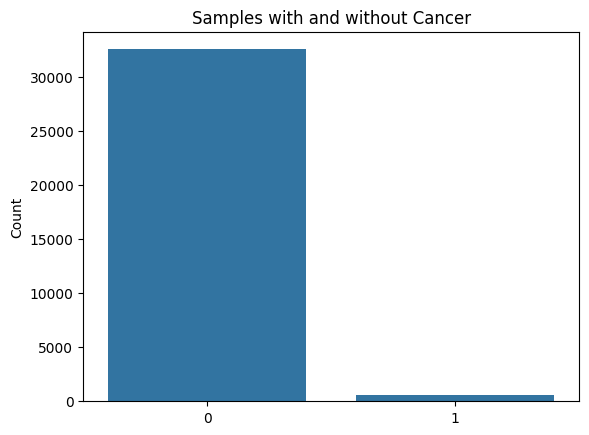

In [9]:
sns.barplot(data=cancer_counts['benign_malignant'])
plt.ylabel('Count')
plt.title('Samples with and without Cancer')
plt.show()

In [10]:
train_sex_counts = train_data['sex'].value_counts().reset_index()
train_sex_counts.head()

,index,sex
0,male,17080
1,female,15981


There are slighly more samples from men in the training data.

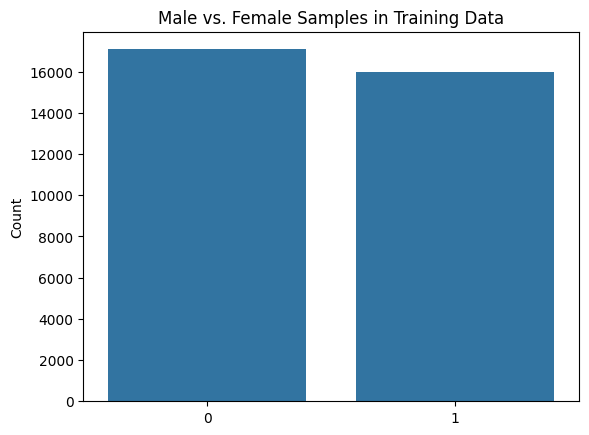

In [11]:
sns.barplot(data=train_sex_counts['sex'])
plt.ylabel('Count')
plt.title('Male vs. Female Samples in Training Data')
plt.show()

In [12]:
test_sex_counts = test_data['sex'].value_counts().reset_index()
test_sex_counts.head()

,index,sex
0,male,6255
1,female,4727


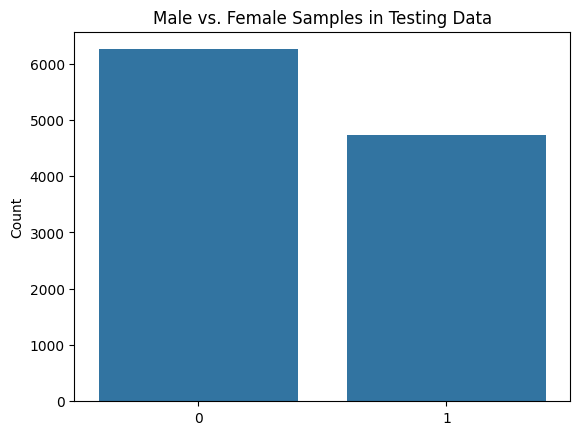

In [13]:
sns.barplot(data=test_sex_counts['sex'])
plt.ylabel('Count')
plt.title('Male vs. Female Samples in Testing Data')
plt.show()

There are also more men in the test data.

In [14]:
train_body_counts = train_data['anatom_site_general_challenge'].value_counts().reset_index()
train_body_counts.head()

,index,anatom_site_general_challenge
0,torso,16845
1,lower extremity,8417
2,upper extremity,4983
3,head/neck,1855
4,palms/soles,375


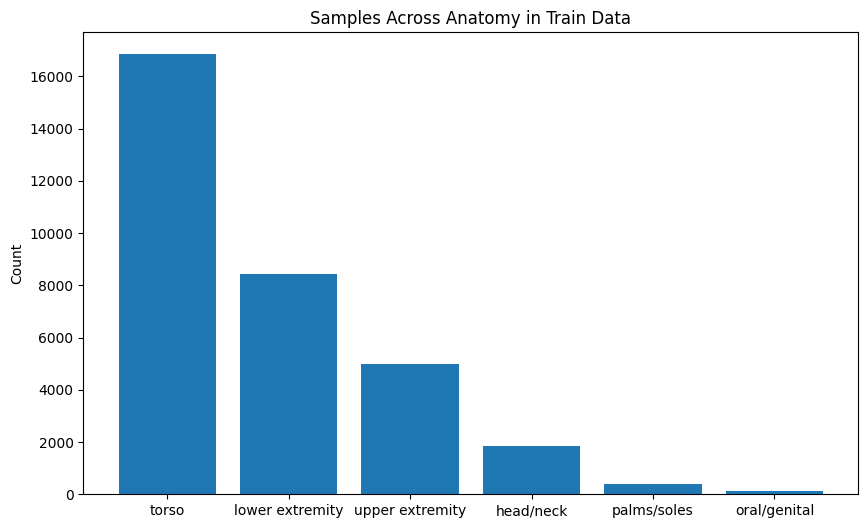

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(train_body_counts['index'], train_body_counts['anatom_site_general_challenge'])
plt.ylabel('Count')
plt.title('Samples Across Anatomy in Train Data')
plt.show()

Most of the training samples are found on the torso, followed by the lower extremity and upper extremity. 

In [16]:
test_body_counts = test_data['anatom_site_general_challenge'].value_counts().reset_index()
test_body_counts.head()

,index,anatom_site_general_challenge
0,torso,5847
1,lower extremity,2501
2,upper extremity,1573
3,head/neck,576
4,palms/soles,108


The testing data looks similar.

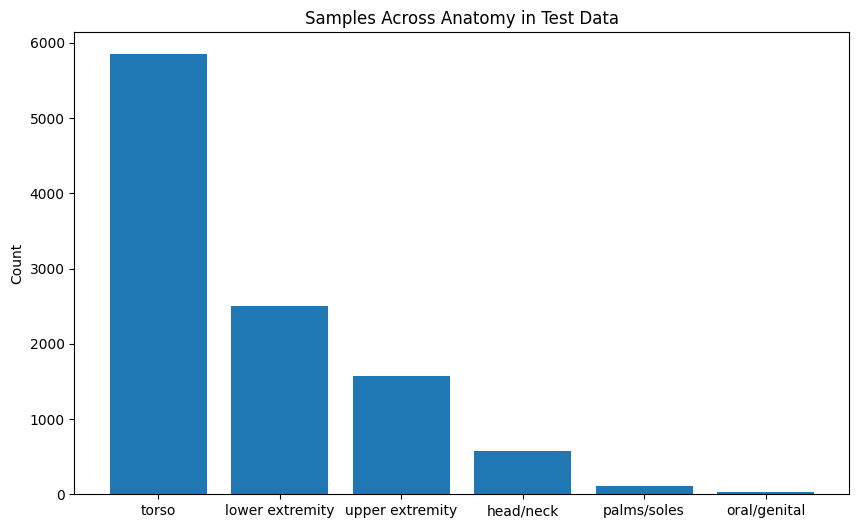

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(test_body_counts['index'], test_body_counts['anatom_site_general_challenge'])
plt.ylabel('Count')
plt.title('Samples Across Anatomy in Test Data')
plt.show()

In [18]:
train_diagnosis_counts = train_data['diagnosis'].value_counts().reset_index()
train_diagnosis_counts.head()

,index,diagnosis
0,unknown,27124
1,nevus,5193
2,melanoma,584
3,seborrheic keratosis,135
4,lentigo NOS,44


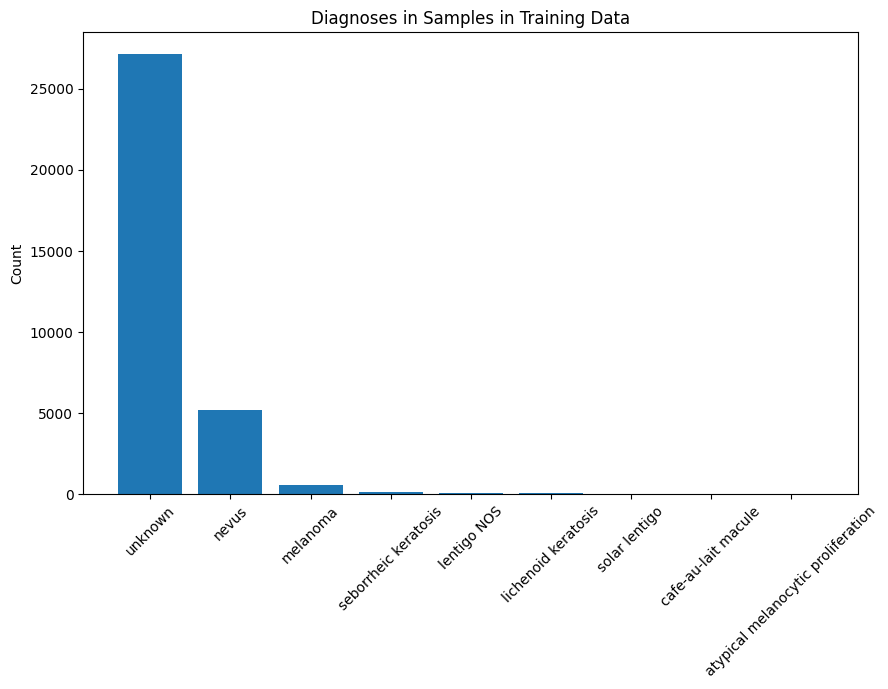

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(train_diagnosis_counts['index'], train_diagnosis_counts['diagnosis'])
plt.ylabel('Count')
plt.title('Diagnoses in Samples in Training Data')
plt.xticks(rotation=45)
plt.show()

Most of the diagnoses in the test data was unknown followed by nevus (moles) and melanoma. 

The null counts are shown below for the samples.

In [20]:
train_data.isnull().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [21]:
test_data.isnull().sum()

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

In [31]:
sex_cancer_counts = train_data.groupby("sex")['benign_malignant'].value_counts().reset_index(name='Count')
sex_cancer_counts.head()

,sex,benign_malignant,Count
0,female,benign,15761
1,female,malignant,220
2,male,benign,16716
3,male,malignant,364


In both cancerous and non-cancerous samples, there are more male samples than female samples.

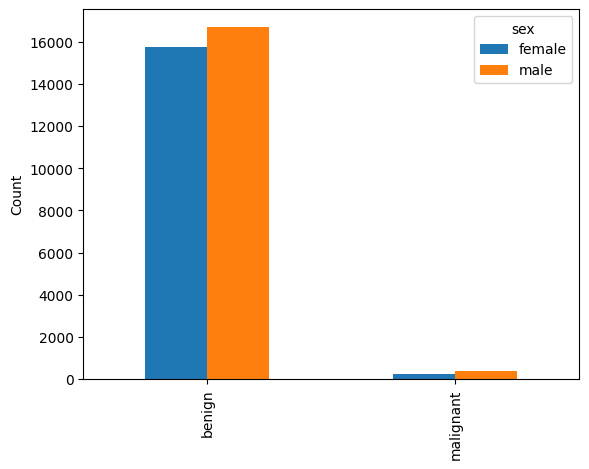

In [45]:
pivot_df = sex_cancer_counts.pivot(index='benign_malignant', columns='sex', values='Count')

pivot_df.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [42]:
body_cancer_counts = train_data.groupby("anatom_site_general_challenge")['benign_malignant'].value_counts().reset_index(name='Count')
body_cancer_counts.head()

,anatom_site_general_challenge,benign_malignant,Count
0,head/neck,benign,1781
1,head/neck,malignant,74
2,lower extremity,benign,8293
3,lower extremity,malignant,124
4,oral/genital,benign,120


Most of the benign and most of the cancerous samples are from the torso followed by the lower extremity.

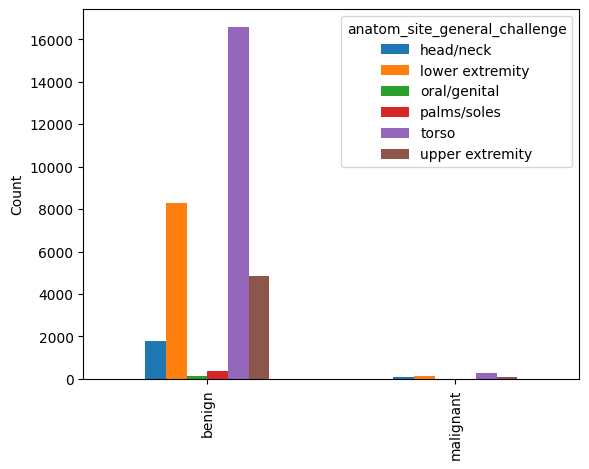

In [44]:
pivot_df = body_cancer_counts.pivot(index='benign_malignant', columns='anatom_site_general_challenge', values='Count')

pivot_df.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [69]:
age_cancer_counts = train_data.groupby("age_approx")['benign_malignant'].value_counts().reset_index(name='Count')
age_cancer_counts

,age_approx,benign_malignant,Count
0,0.0,benign,2
1,10.0,benign,17
2,15.0,benign,130
3,15.0,malignant,2
4,20.0,benign,649
5,20.0,malignant,6
6,25.0,benign,1528
7,25.0,malignant,16
8,30.0,benign,2334
9,30.0,malignant,24


SOMETHING IS WRONG WITH THIS ONE

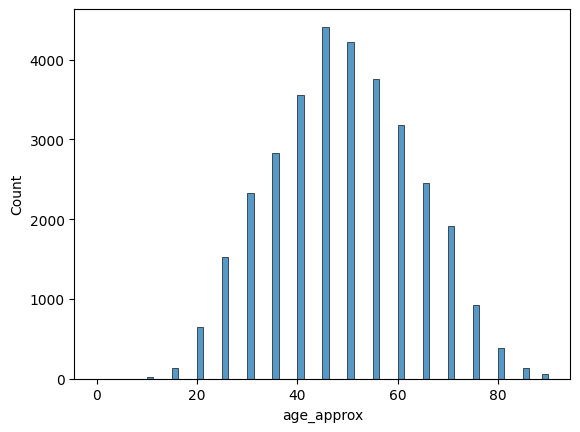

In [67]:
sns.histplot(data=train_data[train_data['benign_malignant'] == 'benign'], x='age_approx')
plt.show()

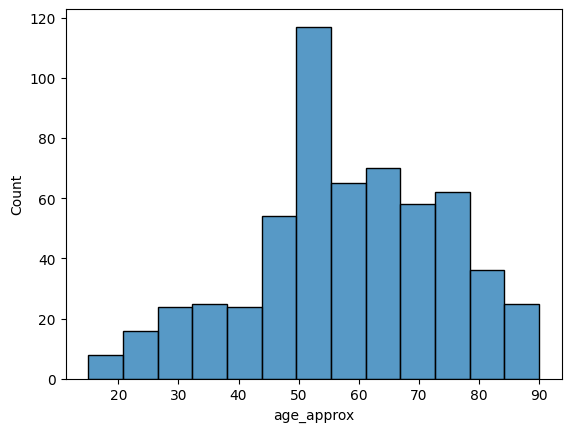

In [68]:
sns.histplot(data=train_data[train_data['benign_malignant'] == 'malignant'], x='age_approx')
plt.show()

The non-cancerous samples appear to be normally distributed while the cancerous samples have a sharp peak  